# **Práctica 2: Señales y Sistemas Discretos**   

Realizado por:

**Antonia Yepes Quintero:** 1036960061

**Isabella Bedoya Orozco:** 1001013873

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Impulso unitario:

In [3]:
def impseq(n0, n1, n2):

# Genera x(n) = delta(n-n0); n1 <= n <= n2

# ----------------------------------------------
    n = np.arange(n1,n2+1) # Se crea el vector de muestras

    x = (n-n0) == 0

    return [x,n]

Utilizando la función:

<StemContainer object of 3 artists>

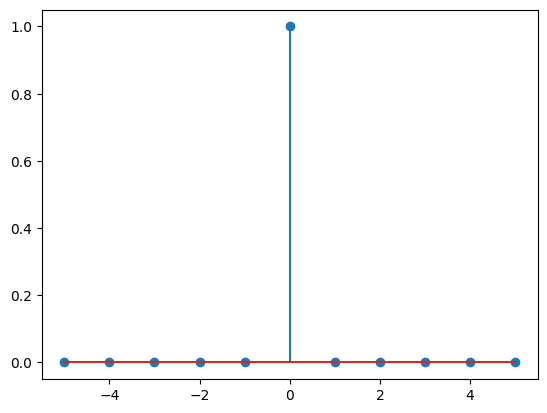

In [ ]:
r,n = impseq(0,-5,5)
plt.stem(n,r)

1.Escalón unitario:

In [4]:
def escseq(n0,n1,n2):
  n = np.arange(n1,n2+1) # Se crea el vector de muestras
  x = (n-n0) >= 0  #Compara y arroja true o flase
  return [x,n]

Utilizando la función:

<StemContainer object of 3 artists>

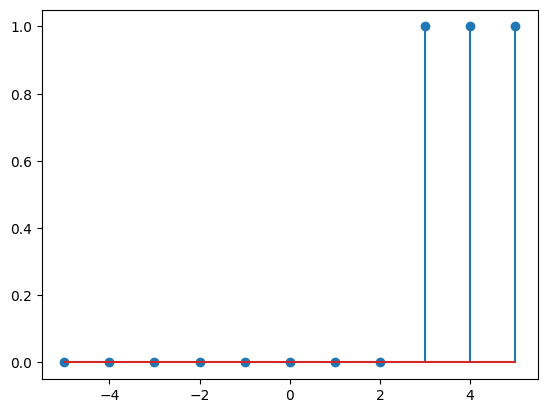

In [5]:
r,n =escseq(3,-5,5)
plt.stem(n,r)

2.Rampa:

In [7]:
def rapseq(m,n0,n1,n2):#no desplazamiento
  n = np.arange(n1,n2+1) # Se crea el vector de muestras
  x = ((n - n0) >= 0)*(n-n0)*m
  return [x, n]

<StemContainer object of 3 artists>

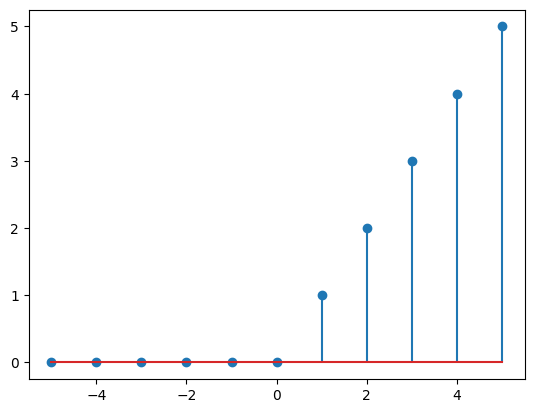

In [9]:
r,n = rapseq(1,0,-5,5)
plt.stem(n ,r)

3. Genere las siguientes secuencias usando las funciones básicas de Python que se han presentado. Grafique los resultados

a) 𝑥1(𝑛)= 3𝛿(𝑛+1)+5𝛿(𝑛+3)+3𝛿(𝑛+2)+3𝛿(𝑛)+ 𝛿(𝑛). ¿Cómo debe ser el vector de muestras?

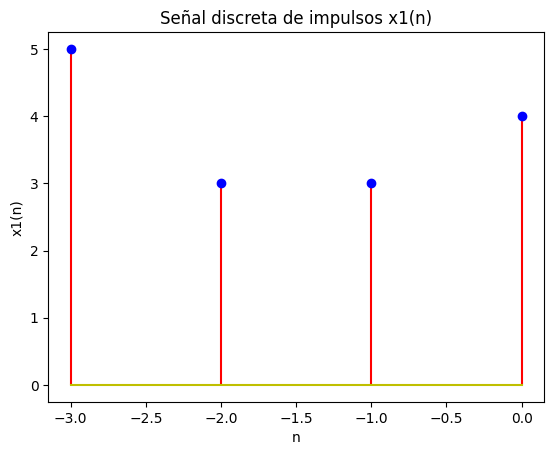

In [11]:
# Se define el vector de muestras
n = np.arange(-3, 1) #se define este vector ya que los valores de n de las señales que satisfacen que n-n0 sea cero son: -3,-2,-1,0
# Se generan las señales unitarias con la función impseq definida y se multiplican por los respectivos coeficientes.
x1 = 3*impseq(-1, -3, 0)[0] + 5*impseq(-3, -3, 0)[0] + 3*impseq(-2, -3, 0)[0] + 3*impseq(0, -3, 0)[0] + impseq(0, -3, 0)[0]
# Gráfica de la secuencia discreta
plt.stem(n, x1, linefmt='red', markerfmt='bo', basefmt='y')
plt.xlabel('n')
plt.ylabel('x1(n)')
plt.title('Señal discreta de impulsos x1(n)')
plt.show()

b) El siguiente sistema arroja una secuencia definida entre −6≤𝑛≤6

<StemContainer object of 3 artists>

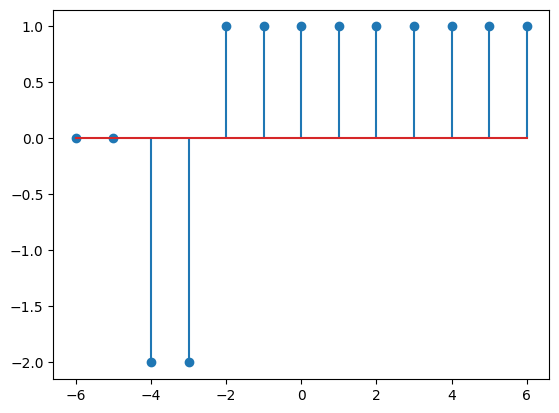

In [20]:
r1, n = escseq(-4,-6,6)
r2, n = escseq(-2,-6,6)
a1= -2*r1
a2= 3*r2
a3 = a1 + a2
plt.stem(n,a3)

c) El siguiente sistema arroja una secuencia definida entre 0≤𝑛≤100

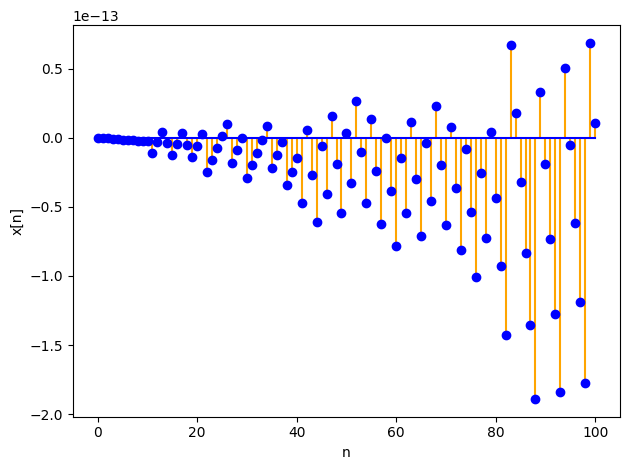

In [25]:
n = np.arange(0,101)
e=np.exp(0.01*n)
sin=np.sin(n)


x3=np.sin(2*np.pi*n)*np.exp(0.01*n)
plt.stem(n,x3, linefmt='orange', markerfmt='bo', basefmt='b')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.tight_layout()
plt.show()

d) 𝑥4(𝑛)= 2𝑟(𝑛+3)−𝑟(𝑛−2)−5𝑢(𝑛−3),−10≤𝑛≤10

<StemContainer object of 3 artists>

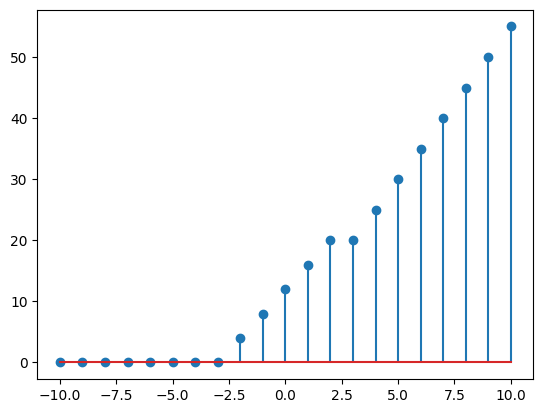

In [27]:
u1, n =escseq(3,-10,10)
r2, n =rapseq(2,-3,-10,10)
r3, n =rapseq(-1,2,-10,10)
x4=2*r2-r3-5*u1
plt.stem(n,x4)

4. Genere la siguiente secuencia
𝑥[𝑛]= {𝑟[𝑛] 0≤𝑛≤5 ; r[𝑛−5] 6≤𝑛≤11; r[𝑛−10] 12≤𝑛≤17}

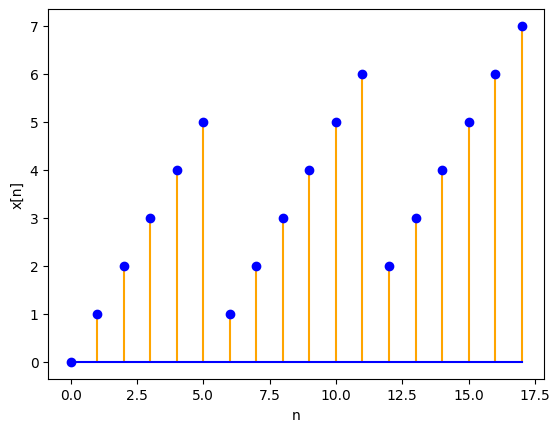

In [29]:
parte_1 = rapseq(1, 0, 0, 5)
parte_2 = rapseq(1, 5, 6, 11)
parte_3 = rapseq(1, 10, 12, 17)

x = np.concatenate((parte_1[0], parte_2[0], parte_3[0]))
n = np.concatenate((parte_1[1], parte_2[1], parte_3[1]))

plt.stem(n, x, linefmt='orange', markerfmt='bo', basefmt='b')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

a) Derive la secuencia

b) Realice un subplot con las dos secuencia, la original y la derivada. Describa lo que observa y el por qué no es exactamente la derivada del caso continuo

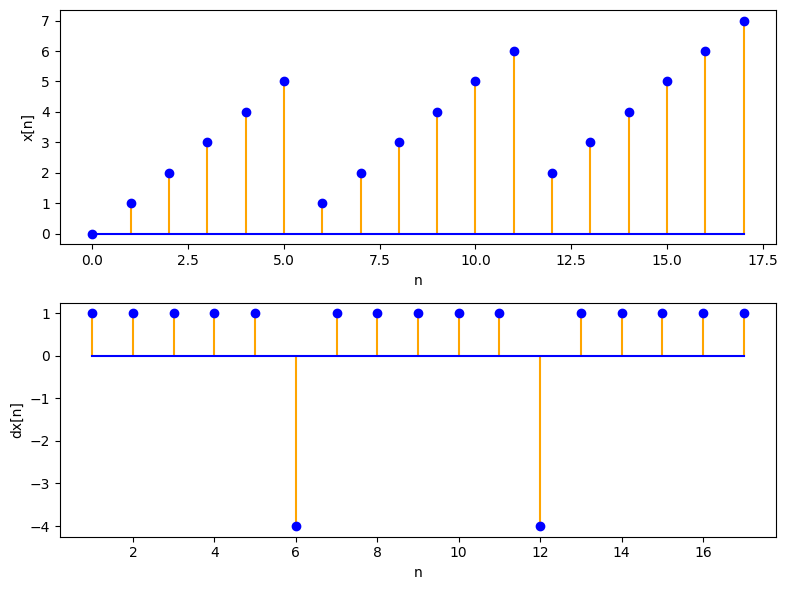

In [30]:
#señal original
parte_1 = rapseq(1, 0, 0, 5)
parte_2 = rapseq(1, 5, 6, 11)
parte_3 = rapseq(1, 10, 12, 17)
x = np.concatenate((parte_1[0], parte_2[0], parte_3[0]))
n = np.concatenate((parte_1[1], parte_2[1], parte_3[1]))
#se deriva la señal
dx = np.diff(x) / np.diff(n)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
ax1.stem(n,x, linefmt='orange', markerfmt='bo', basefmt='b')
ax1.set_xlabel('n')
ax1.set_ylabel('x[n]')
ax2.stem(n[1:], dx, linefmt='orange', markerfmt='bo', basefmt='b')
ax2.set_xlabel('n')
ax2.set_ylabel('dx[n]')
fig.tight_layout()
plt.show()

La gráfica muestra la señal original x[n] y su derivada discreta dx[n], calculada mediante diferencias finitas entre los puntos de la señal. Al observar la derivada discreta, se nota que esta no es suave, sino que se compone de puntos discretos que reflejan los cambios entre valores consecutivos de la señal. Por otro lado, la derivada en el caso continuo, sería una función continua y suave, ya que se obtiene considerando el límite cuando el intervalo de tiempo tiende a cero. La derivada discreta no captura todos los puntos de la variación continua, ya que solo mide un numero demuestras determinado, lo que conduce a una representación escalonada y no continua de los cambios en la señal.

5. Sea 𝑥(𝑛)={0,1,2,3,4,5̂,4,3,2,1,0,1,2,3,4,5,5,5,5,10,10,10,10}. Genere la secuencia anterior y grafique los resultados. Use las funciones que generó antes para generar la secuencia concatenando secuencias más simples. Además, encuentre las siguientes secuencias:


<StemContainer object of 3 artists>

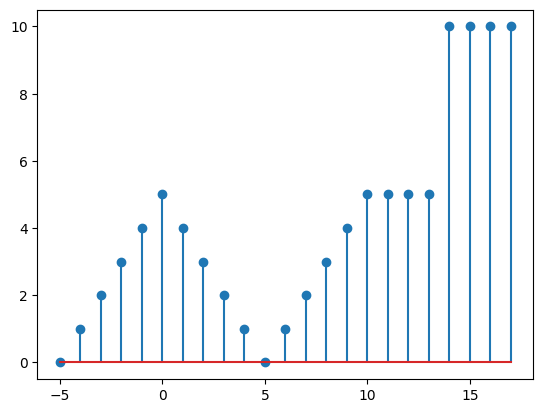

In [37]:
u1, n =escseq(0,0,2)
u2, n =escseq(0,0,3)
r1, n =rapseq(1,0,0,5)
s1=np.delete(r1,5)
s2=np.flip(np.delete(r1,0))
x = np.concatenate((s1,s2,r1,u1*5,u2*10))
n1 = np.arange(-5,18)
plt.stem(n1,x)

a) 𝑥5(𝑛)=2𝑥(𝑛−4)+𝑥(𝑛)

<StemContainer object of 3 artists>

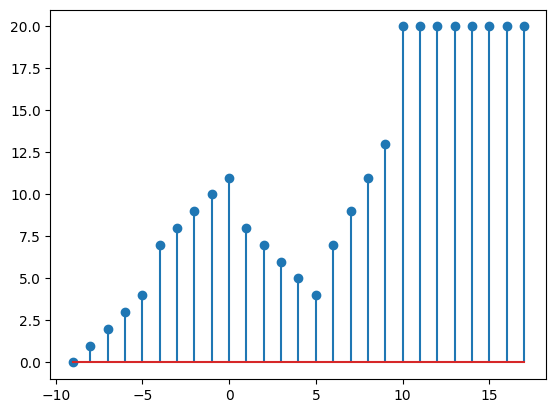

In [38]:
x2=np.append([0,0,0,0],x)
x3=np.append(x,[0,0,0,0])
n5=np.arange(-9,18)
plt.stem(n5,x3+2*x2)

b) 𝑥6(𝑛)=0.001(𝑒^(0.5𝑛))*𝑥(𝑛)+10𝑠𝑖𝑛(0.05𝜋𝑛)𝑥(𝑛+2),−20≤𝑛≤20

<StemContainer object of 3 artists>

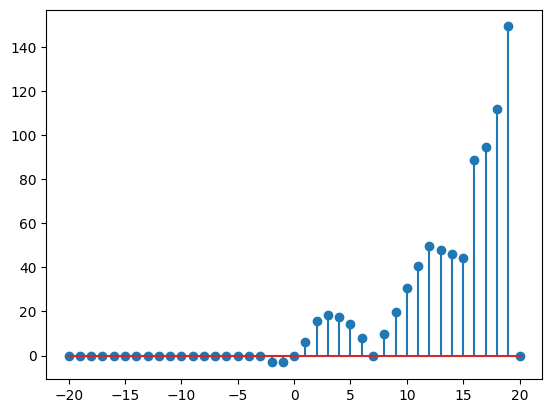

In [39]:
n=np.arange(-20,21)
x0=np.append(np.zeros((15,), dtype=int),x)
x1=np.append(x0,np.zeros((3,), dtype=int))
x2=np.delete(x1,[40,39])

x2=np.append(np.zeros((2,), dtype=int),x2)
p1=0.001*np.exp(0.5*n)*(x2)

p2=10*np.sin(0.05*np.pi*n)*x2
plt.stem(n,p1+p2)